In [1]:
# importing of all necessary libraries

import tensorflow as tf
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler, StandardScaler


DATA PREPROCESSING

In [2]:
# loading of diabetes dataset
df=pd.read_csv('diabetes.csv')
# look of top 5 rows of data
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [3]:
# gives the description of data according to columns
df.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [4]:
# look of top 5 rows of data
df.tail()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1
767,1,93,70,31,0,30.4,0.315,23,0


In [5]:
# gives the non-null count and data type of each column
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [6]:
# gives the number of rows and columns in the dataset
df.shape

(768, 9)

<Axes: xlabel='Pregnancies'>

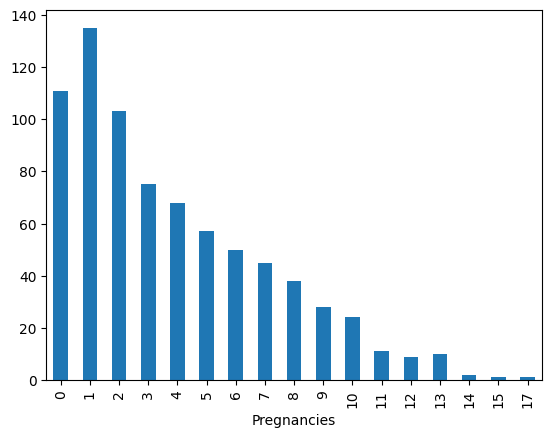

In [7]:
# plotting of Pregnancies data
df['Pregnancies'].value_counts().sort_index().plot(kind='bar')

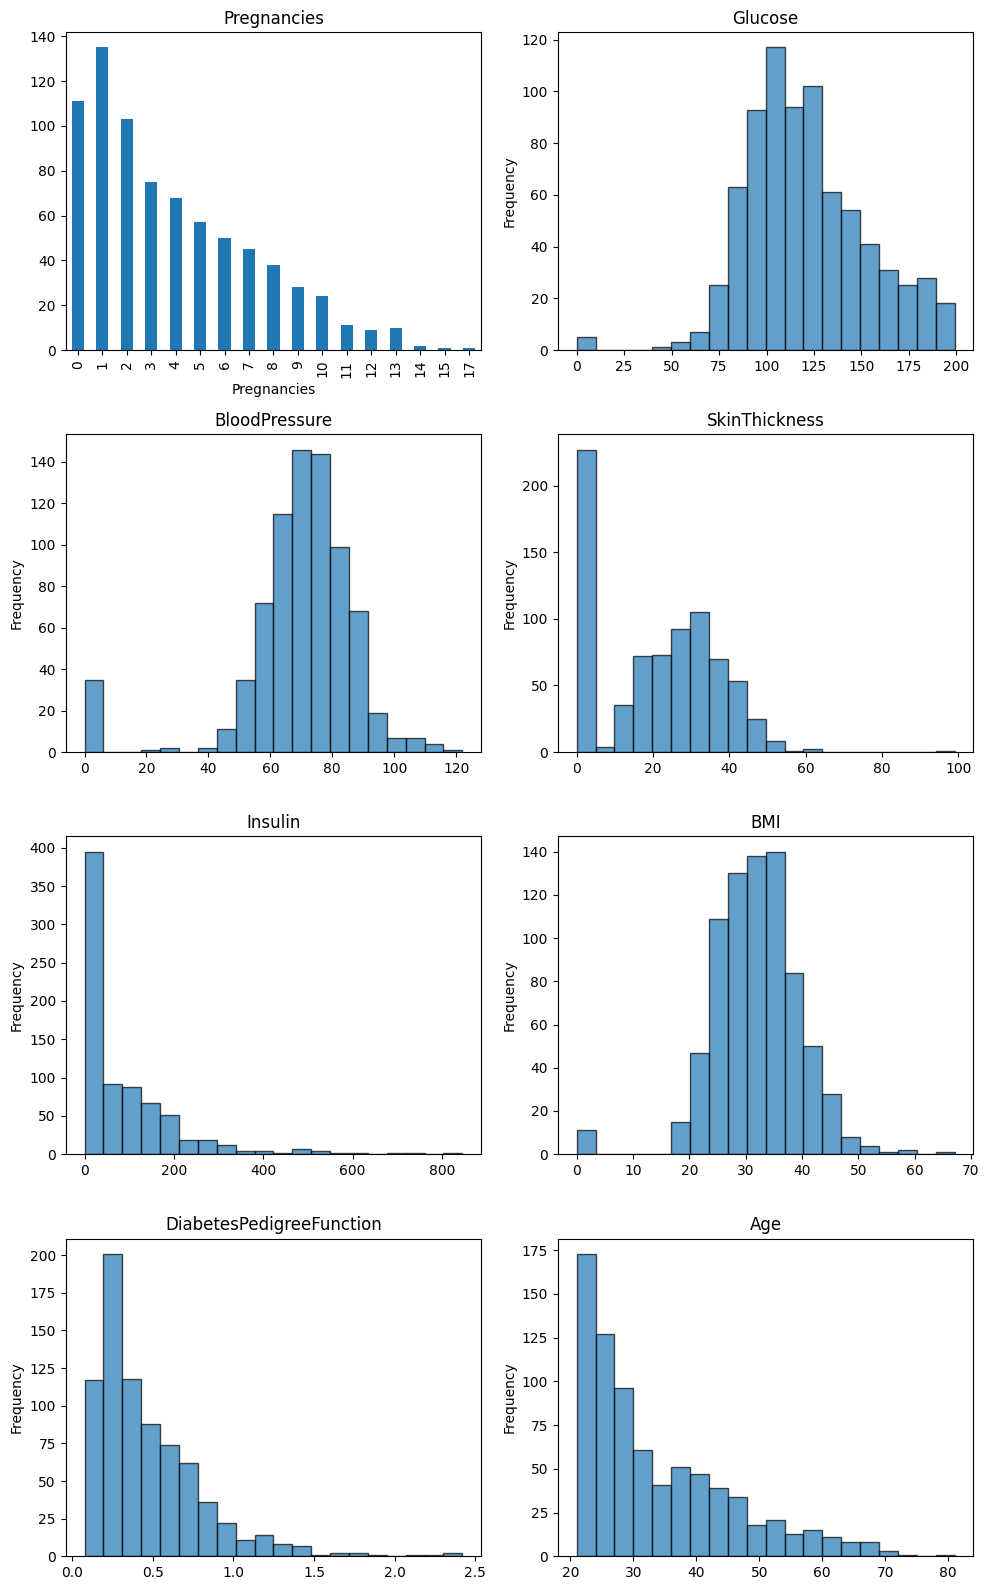

In [ ]:
# plotting of data of all columns
plt.figure(figsize=(10, 16))

plt.subplot(4, 2, 1)
plt.title('Pregnancies')
df['Pregnancies'].value_counts().sort_index().plot(kind='bar')

for i in range(1, 8):
    plt.subplot(4, 2, i + 1)
    df.iloc[:, i].plot(kind='hist', bins=20, edgecolor='black', alpha=0.7)
    plt.title(df.columns[i])


plt.tight_layout()

plt.show()


In [9]:
df['Insulin'].value_counts().sort_index()

,count
Insulin,
0,374
14,1
15,1
16,1
18,2
...,...
579,1
600,1
680,1


In [10]:
# seperation of data frame df into df1 and df2 based on outcome
df1=df[df['Outcome']==0]
df2=df[df['Outcome']==1]
df1.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
1,1,85,66,29,0,26.6,0.351,31,0
3,1,89,66,23,94,28.1,0.167,21,0
5,5,116,74,0,0,25.6,0.201,30,0
7,10,115,0,0,0,35.3,0.134,29,0
10,4,110,92,0,0,37.6,0.191,30,0


In [11]:
df2.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
2,8,183,64,0,0,23.3,0.672,32,1
4,0,137,40,35,168,43.1,2.288,33,1
6,3,78,50,32,88,31.0,0.248,26,1
8,2,197,70,45,543,30.5,0.158,53,1


<ipython-input-12-c77cb2cc661e>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1[zero_columns] = df1[zero_columns].replace(0, np.nan)
<ipython-input-12-c77cb2cc661e>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2[zero_columns] = df2[zero_columns].replace(0, np.nan)
<ipython-input-12-c77cb2cc661e>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#r

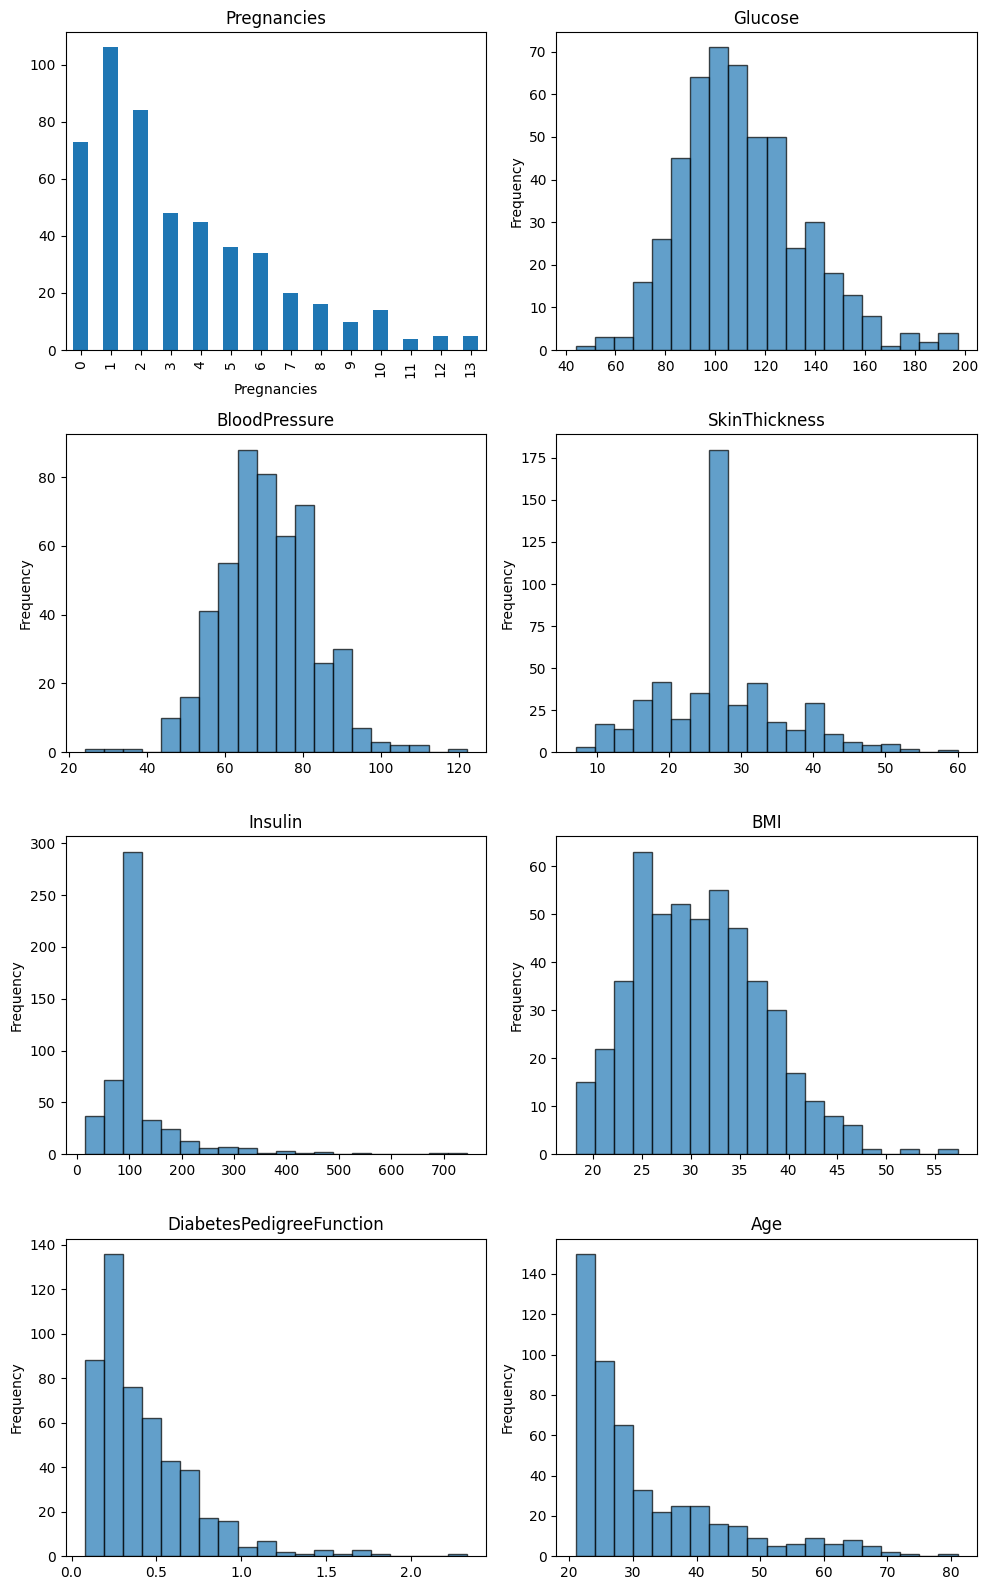

In [12]:
# Imputation of missing-data with median
zero_columns = ["Glucose", "BloodPressure", "SkinThickness", "Insulin", "BMI"]
df1[zero_columns] = df1[zero_columns].replace(0, np.nan)
df2[zero_columns] = df2[zero_columns].replace(0, np.nan)


df1.fillna(df1.median(),inplace=True)
df2.fillna(df2.median(),inplace=True)


# plotting of data of all columns after imputation
plt.figure(figsize=(10, 16))

plt.subplot(4, 2, 1)
plt.title('Pregnancies')
df1['Pregnancies'].value_counts().sort_index().plot(kind='bar')

for i in range(1, 8):
    plt.subplot(4, 2, i + 1)
    df1.iloc[:, i].plot(kind='hist', bins=20, edgecolor='black', alpha=0.7)
    plt.title(df.columns[i])

# Adjust spacing automatically
plt.tight_layout()

plt.show()



In [13]:
# combining df1 and df2
df_combined = pd.concat([df1, df2])
df_combined.sort_index(inplace=True)
df_combined.head(10)

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148.0,72.0,35.0,169.5,33.6,0.627,50,1
1,1,85.0,66.0,29.0,102.5,26.6,0.351,31,0
2,8,183.0,64.0,32.0,169.5,23.3,0.672,32,1
3,1,89.0,66.0,23.0,94.0,28.1,0.167,21,0
4,0,137.0,40.0,35.0,168.0,43.1,2.288,33,1
5,5,116.0,74.0,27.0,102.5,25.6,0.201,30,0
6,3,78.0,50.0,32.0,88.0,31.0,0.248,26,1
7,10,115.0,70.0,27.0,102.5,35.3,0.134,29,0
8,2,197.0,70.0,45.0,543.0,30.5,0.158,53,1
9,8,125.0,96.0,32.0,169.5,34.3,0.232,54,1


In [14]:
# Feature and target seperation
X=df_combined.drop('Outcome',axis=1)
y=df_combined['Outcome']
X.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
0,6,148.0,72.0,35.0,169.5,33.6,0.627,50
1,1,85.0,66.0,29.0,102.5,26.6,0.351,31
2,8,183.0,64.0,32.0,169.5,23.3,0.672,32
3,1,89.0,66.0,23.0,94.0,28.1,0.167,21
4,0,137.0,40.0,35.0,168.0,43.1,2.288,33


In [15]:
# Feature scaling
scaler=MinMaxScaler()
X_final=scaler.fit_transform(X)
X_final=pd.DataFrame(X_final,columns=X.columns)
X_final.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
0,0.352941,0.670968,0.489796,0.304348,0.186899,0.314928,0.234415,0.483333
1,0.058824,0.264516,0.428571,0.239130,0.106370,0.171779,0.116567,0.166667
2,0.470588,0.896774,0.408163,0.271739,0.186899,0.104294,0.253629,0.183333
3,0.058824,0.290323,0.428571,0.173913,0.096154,0.202454,0.038002,0.000000
4,0.000000,0.600000,0.163265,0.304348,0.185096,0.509202,0.943638,0.200000


MODEL TRAINING

In [16]:
# Splitting of data for training(80%) and testing(20%)
from sklearn.model_selection import train_test_split
X_train,X_test,Y_train,Y_test=train_test_split(X_final,y,test_size=0.2,random_state=42)

In [17]:
# import of libraries
from tensorflow.keras.models import Sequential,load_model
from tensorflow.keras.layers import Dense,Input
from sklearn.metrics import accuracy_score,recall_score

In [18]:
# creation of a Sequential model
model = Sequential([
    # input layer
    Input(shape=(X_final.shape[1],)),
    # 8 neurons in first hidden layer
    Dense(units=8, activation='relu'),
    # 4 neurons in first hidden layer
    Dense(units=4, activation='relu'),
    # output layer with activation function:'sigmoid'
    Dense(units=1, activation='sigmoid')
])

In [19]:
# creation of model with loss as binary_crossentropy, optimizer as adam
# here with sgd very large number of epochs are needed so adam is used as optimizer
model.compile(loss='binary_crossentropy',optimizer='adam',metrics=['accuracy'])

In [20]:
#Model generation with our training dataset
#batch_size of 64
epochs=1000
history=model.fit(X_train,Y_train,epochs=epochs,batch_size=64,validation_data=(X_test,Y_test))

Epoch 1/1000
10/10 ━━━━━━━━━━━━━━━━━━━━ 4s 176ms/step - accuracy: 0.6700 - loss: 0.6789 - val_accuracy: 0.6429 - val_loss: 0.6756
Epoch 2/1000
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - accuracy: 0.6440 - loss: 0.6775 - val_accuracy: 0.6429 - val_loss: 0.6723
Epoch 3/1000
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.6818 - loss: 0.6689 - val_accuracy: 0.6429 - val_loss: 0.6687
Epoch 4/1000
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.6386 - loss: 0.6723 - val_accuracy: 0.6429 - val_loss: 0.6658
Epoch 5/1000
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.6455 - loss: 0.6687 - val_accuracy: 0.6429 - val_loss: 0.6626
Epoch 6/1000
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.6562 - loss: 0.6611 - val_accuracy: 0.6429 - val_loss: 0.6595
Epoch 7/1000
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.6613 - loss: 0.6573 - val_accuracy: 0.6429 - val_loss: 0.6565
Epoch 8/1000
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.6524 - loss: 0.6560 - val_accuracy:

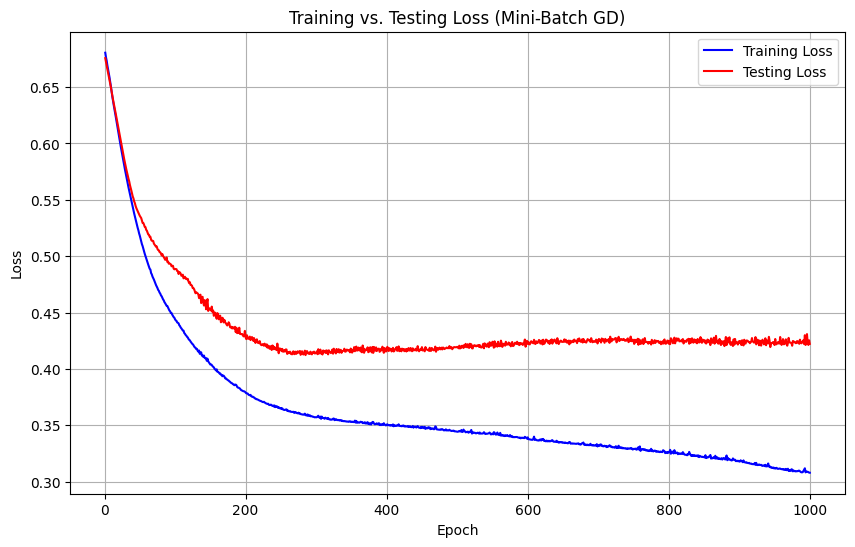

In [21]:
# plot of loss vs epochs
plt.figure(figsize=(10, 6))
plt.plot(range(1, epochs+1), history.history['loss'], label='Training Loss', color='blue')
plt.plot(range(1, epochs+1), history.history['val_loss'], label='Testing Loss', color='red')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Training vs. Testing Loss (Mini-Batch GD)')
plt.grid(True)
plt.legend()
plt.show()


In [22]:
# to get the epoch at which min of test loss happens
l=history.history['val_loss']
min_index=l.index(min(l))
print(min_index)

284


EVALUATION OF OPTIMUM MODEL

In [23]:
# creation of optimum_model
optimum_model = Sequential([
    Input(shape=(X_final.shape[1],)),
    Dense(units=8, activation='relu'),
    Dense(units=4, activation='relu'),
    Dense(units=1, activation='sigmoid')
])

In [24]:
optimum_model.compile(loss='binary_crossentropy',optimizer='adam',metrics=['accuracy'])

In [25]:
# optimum_model predictions for min_index epochs
history_final=optimum_model.fit(X_train,Y_train,epochs=min_index,batch_size=64,validation_data=(X_test,Y_test))

Epoch 1/284
10/10 ━━━━━━━━━━━━━━━━━━━━ 2s 111ms/step - accuracy: 0.3312 - loss: 0.7983 - val_accuracy: 0.3571 - val_loss: 0.7647
Epoch 2/284
10/10 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - accuracy: 0.3585 - loss: 0.7600 - val_accuracy: 0.3571 - val_loss: 0.7419
Epoch 3/284
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.3601 - loss: 0.7365 - val_accuracy: 0.3571 - val_loss: 0.7229
Epoch 4/284
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.3581 - loss: 0.7189 - val_accuracy: 0.4026 - val_loss: 0.7066
Epoch 5/284
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.3942 - loss: 0.7068 - val_accuracy: 0.4870 - val_loss: 0.6932
Epoch 6/284
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.5106 - loss: 0.6928 - val_accuracy: 0.5974 - val_loss: 0.6836
Epoch 7/284
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.5986 - loss: 0.6873 - val_accuracy: 0.6818 - val_loss: 0.6769
Epoch 8/284
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.6468 - loss: 0.6798 - val_accuracy: 0.6688 -

In [26]:
# predicting the output values on optimium model with a threshold of 0.5 on output
Y_test_prob=optimum_model.predict(X_test)
Y_test_pred=[0 if val<0.5 else 1 for val in Y_test_prob]
Y_train_prob=optimum_model.predict(X_train)
Y_train_pred=[0 if val<0.5 else 1 for val in Y_train_prob]

5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step


In [27]:
# accuracy and recall of train, test sets
train_accuracy_score=accuracy_score(Y_train,Y_train_pred)
test_accuracy_score=accuracy_score(Y_test,Y_test_pred)

train_recall_score=recall_score(Y_train,Y_train_pred)
test_recall_score=recall_score(Y_test,Y_test_pred)
print(f'accuracy score of train data is {train_accuracy_score}')
print(f'recall score of train data is {train_recall_score}')
print()
print(f'accuracy score of test data is {test_accuracy_score}')
print(f'recall score of test data is {test_recall_score}')


# Here we calculated recall because for medical datsets recall should have to maximum
# Recall = (TP/TP+FN) (TP->True Positive(number of predicted 1's with actual outcome 1) ,FN->False Negative(Number of predicted 0's with actual outcome as 1))
# As we can see recall depends on FN if Fn is low then recall is high (FN low means our model predicting outcome as 1 more efficiently if our actual outcome is 1)


accuracy score of train data is 0.8355048859934854
recall score of train data is 0.7276995305164319

accuracy score of test data is 0.8116883116883117
recall score of test data is 0.7454545454545455
